In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
data_dir=r"C:\Users\koreg\Desktop\Jupyter Files\Images"

In [4]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4920 files belonging to 2 classes.
Using 3936 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4920 files belonging to 2 classes.
Using 984 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['glasses', 'no_glasses']


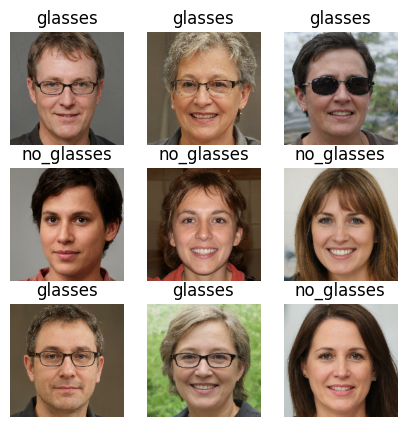

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
epochs=10
epochs_hist = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


C:\Users\koreg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


123/123 [==============================] - 85s 675ms/step - loss: 0.2376 - accuracy: 0.8890 - val_loss: 0.0262 - val_accuracy: 0.9909
Epoch 2/10
123/123 [==============================] - 69s 555ms/step - loss: 0.0139 - accuracy: 0.9949 - val_loss: 0.0106 - val_accuracy: 0.9980
Epoch 3/10
123/123 [==============================] - 68s 553ms/step - loss: 0.0149 - accuracy: 0.9947 - val_loss: 0.0078 - val_accuracy: 0.9970
Epoch 4/10
123/123 [==============================] - 69s 559ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0078 - val_accuracy: 0.9959
Epoch 5/10
123/123 [==============================] - 68s 548ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/10
123/123 [==============================] - 69s 555ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/10
123/123 [==============================] - 70s 565ms/step - loss: 0.0022 - accuracy: 0.9990 - val_loss: 0.0073 - val_accuracy: 0.9

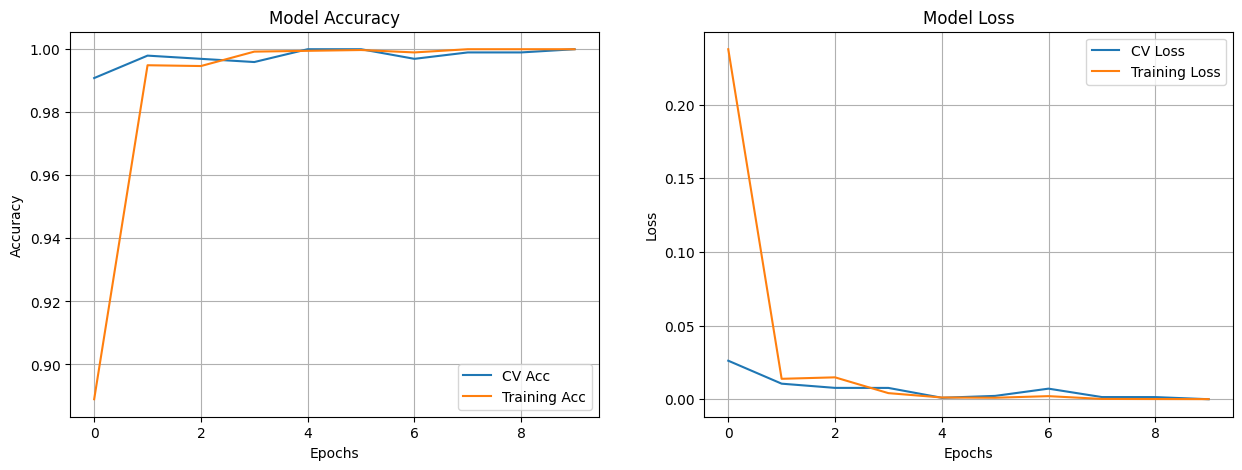

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [13]:
score = model.evaluate(train_ds, batch_size=32, verbose=1)

123/123 [==============================] - 17s 135ms/step - loss: 6.3565e-06 - accuracy: 1.0000


In [14]:
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))

Accuracy on Test Set : 100.00%


In [15]:
import gradio as gr
from gradio.components import Image

In [16]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [18]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True',share='True')

C:\Users\koreg\AppData\Local\Temp\ipykernel_23220\4196644149.py:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(180,180))
C:\Users\koreg\AppData\Local\Temp\ipykernel_23220\4196644149.py:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(180,180))
C:\Users\koreg\AppData\Local\Temp\ipykernel_23220\4196644149.py:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=2)
C:\Users\koreg\AppData\Local\Temp\ipykernel_23220\4196644149.py:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=2)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://dbb71d8476cca4e348.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


KeyboardInterrupt: 